In [ ]:
# Built-in imports
import os
import sys
import random

# Image processing imports
import cv2

# Machine learning imports
import numpy as np; print('NUMPY Version:{}'.format(np.__version__))
import pandas as pd; print('PANDAS Version:{}'.format(pd.__version__))
import tensorflow as tf; print('TENSORFLOW Version:{}'.format(tf.__version__))

# Visualization imports
import matplotlib.pyplot as plt

NUMPY Version:1.21.5
PANDAS Version:1.4.2
TENSORFLOW Version:2.9.1


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  
IMG_SIZE = 300
BATCH_SIZE = 32
EPOCHS = 10

DATA_DIR = 'data3a/'
train_dir = os.path.join(DATA_DIR, 'training/')
test_dir = os.path.join(DATA_DIR, 'validation/')

# Attempt at deterministic outputs(Reproducibility)
def seed_it_all(seed=7):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    #rng = np.random.default_rng(seed)
    
seed_it_all()

In [ ]:
num_train_front = len(os.listdir(train_dir + '01-minor/'))
num_train_rear = len(os.listdir(train_dir + '02-moderate/'))
num_train_side = len(os.listdir(train_dir + '03-severe/'))

print("Number of front train images:{}".format(num_train_front))
print("Number of rear train images:{}".format(num_train_rear))
print("Number of side train images:{}".format(num_train_side))
print("Total train images:{}".format(num_train_front + num_train_rear + num_train_side ))

print('\n')

num_test_front = len(os.listdir(test_dir + '01-minor/'))
num_test_rear = len(os.listdir(test_dir + '02-moderate/'))
num_test_side = len(os.listdir(test_dir + '03-severe/'))

print("Number of front test images:{}".format(num_test_front))
print("Number of rear test images:{}".format(num_test_rear))
print("Number of side test images:{}".format(num_test_side))
print("Total test images:{}".format(num_test_front + num_test_rear + num_train_side))

Number of front train images:278
Number of rear train images:315
Number of side train images:386
Total train images:979


Number of front test images:48
Number of rear test images:55
Number of side test images:68
Total test images:489


In [ ]:
def display_multiple_img(image_dir, rows, cols):
    """
    Function to Display Images from Dataset.
    
    parameters: image_dir(string) - Path of directory with images
                rows(int) - No. of Rows in Output
                cols(int) - No. of Columns in Output
    """
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8))
    for ind,image_path in enumerate(os.listdir(image_dir)):
        image = cv2.imread(image_dir + image_path, -1)
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_xlabel(image.shape)
        except:
            continue;
        
    plt.tight_layout()
    plt.show()

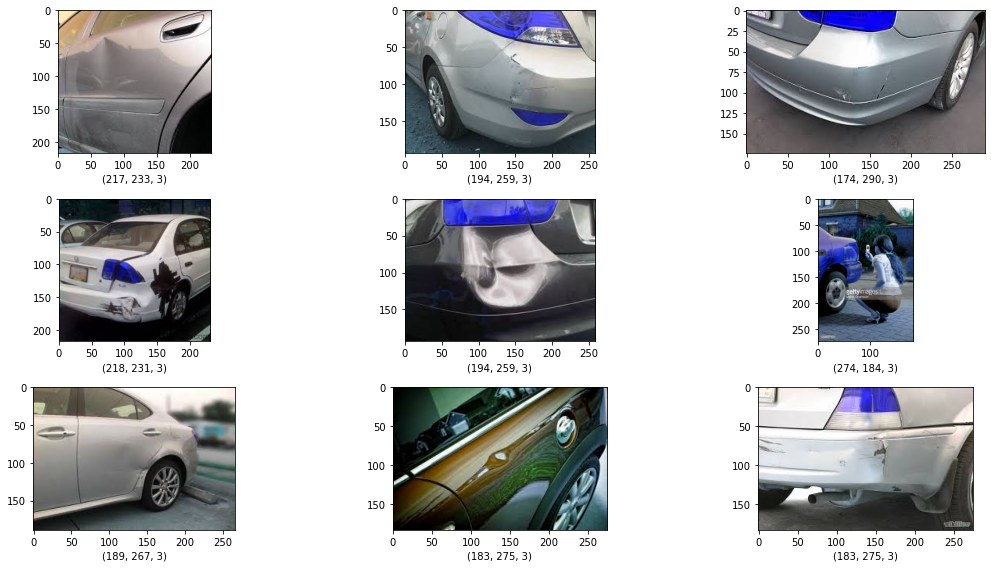

In [ ]:
# Display damaged cars
display_multiple_img(train_dir + '01-minor/', 3, 3)

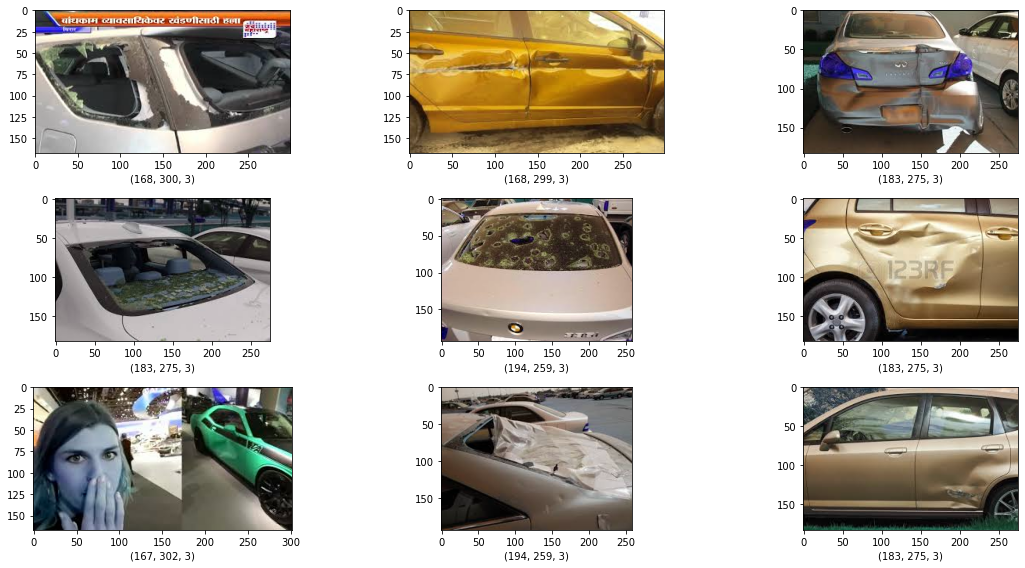

In [ ]:
# Display damaged cars
display_multiple_img(train_dir + '02-moderate/', 3, 3)

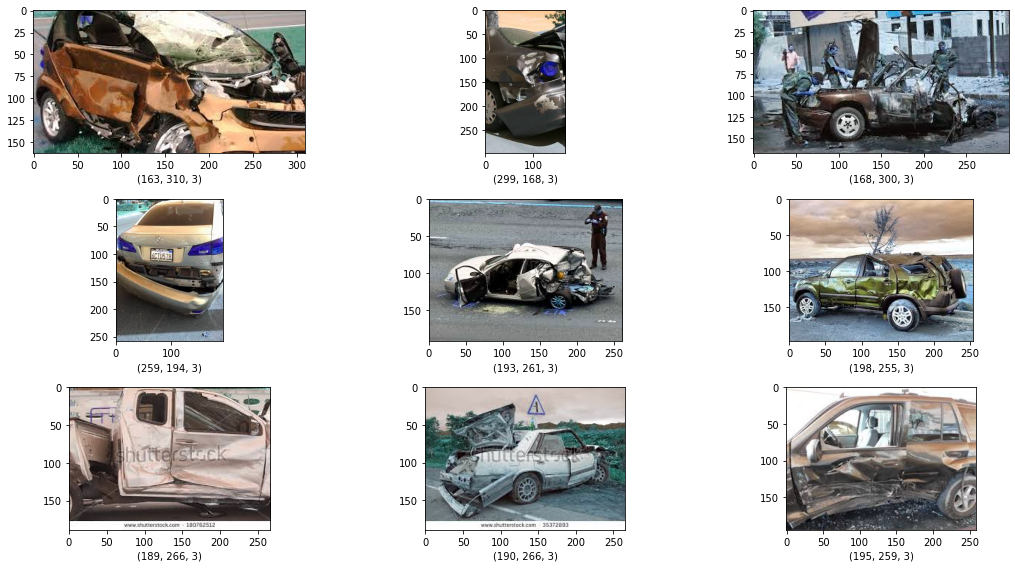

In [ ]:
# Display damaged cars
display_multiple_img(train_dir + '03-severe/', 3, 3)

In [ ]:
testing_data = []
CATEGORIES=['01-minor', '02-moderate','03-severe']
IMG_SIZE=128
import os
import cv2
from tqdm import tqdm
def create_testing_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(test_dir,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  
                # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_testing_data()

print(len(testing_data))

100%|█████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 981.07it/s]

171


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                  rotation_range=40,
                                  width_shift_range=0.4,
                                  height_shift_range=0.4,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(train_dir,
                                          target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size = BATCH_SIZE,
                                          class_mode = 'categorical',
                                          subset='training')

validation_generator = train_datagen.flow_from_directory(
                                            train_dir,
                                            target_size=(IMG_SIZE, IMG_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical',
                                            subset='validation')
                                         
test_dataset = test_datagen.flow_from_directory(test_dir,
                                          shuffle=True,
                                          target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size = BATCH_SIZE,
                                          class_mode = 'categorical')

test_dataset.class_indices

Found 784 images belonging to 3 classes.
Found 195 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


{'01-minor': 0, '02-moderate': 1, '03-severe': 2}

In [ ]:
####################TEST################
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam as Adam

In [ ]:
import os
import h5py
import numpy as np
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,array_to_img, load_img
from tensorflow.keras.regularizers import l2, l1
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History

In [ ]:
def block(x, filters, kernel_size, repetitions, pool_size=2, strides=2):
    for i in range(repetitions):
        x = tf.keras.layers.Conv2D(filters, kernel_size, activation='relu', padding='same')(x)
    #x = tf.keras.layers.MaxPooling2D(pool_size, strides)(x)
    return x

In [ ]:
def get_model():
    image_inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE , 3))
    x = block(image_inputs, 126, 3, 2)
    x = tf.keras.layers.MaxPooling2D(2, 2)(x)
    x = block(x, 61, 3, 2)
    x = tf.keras.layers.MaxPooling2D(2, 2)(x)
    x = block(x, 28, 3, 2)
    x = tf.keras.layers.MaxPooling2D(2, 2)(x)
    x = block(x, 12, 3, 2)
    x = tf.keras.layers.MaxPooling2D(2, 2)(x)
    #x = block(x, 28, 3, 2)
    #x = block(x, 14, 3, 2)
    #x = block(x, 512, 3, 2)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    #x = Dense(128, activation = 'relu')
    #x = Dropout(0.5)
    output = tf.keras.layers.Dense(3, activation = 'softmax')(x)
   # output = tf.keras.layers.Dense(3)(x)
    model = tf.keras.Model(inputs=[image_inputs], outputs=[output])
    return model

In [ ]:
model = get_model()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= Adam(lr = 0.00005), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001)
#lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', verbose=1, patience=10, factor=0.2, min_learning_rate=0.0001)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('severity2.h5', monitor='val_accuracy', verbose=1,save_best_only=True,save_weights_only=False,mode='max')

callbacks = [early_stopping, model_checkpoint]

C:\Users\cdma_pc\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
####################TEST################
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
           class_weight='balanced',
           classes=np.unique(train_dataset.classes), 
           y=train_dataset.classes)
class_weights

array([1.17189836, 1.03703704, 0.84573894])

In [ ]:
history = model.fit(train_dataset, 
                    validation_data=validation_generator,
                    epochs=50,
                    callbacks=callbacks,
                    steps_per_epoch = train_dataset.samples // 4,
                    validation_steps = validation_generator.samples // 4,
                    workers=16,
                    batch_size=BATCH_SIZE)


Epoch 1/50
179/196 [==========================>...] - ETA: 2:27 - loss: 1.0890 - accuracy: 0.3939

KeyboardInterrupt: 

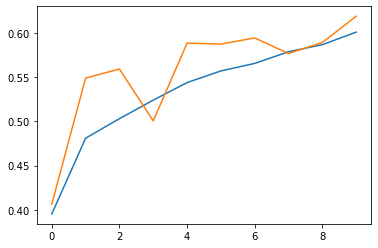

In [ ]:
####################TEST################
import seaborn as sns
loss=pd.DataFrame(model.history.history)
plt.plot(loss['accuracy'])
plt.plot(loss['val_accuracy'])

In [ ]:
#############################################Architecture############################################

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils import np_utils
from keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
#from mlxtend.evaluate import confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix

IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128






# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [ ]:
######################################################

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

import time
import os
import constants as CONST

def get_model():
    model = tf.keras.Sequential()#Sequential()
    model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    
    
    model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2)) ## 
    
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3)) ##
    model.add(Dense(3, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    print('model prepared...')
    return model

In [ ]:
model = get_model()

model prepared...


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= Adam(lr = 0.00005), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001)
#lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', verbose=1, patience=10, factor=0.2, min_learning_rate=0.0001)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('vgg19_stage3_fc.hdf5', monitor='val_accuracy', verbose=1,save_best_only=True,save_weights_only=False,mode='max')

callbacks = [early_stopping, model_checkpoint]

In [ ]:
history = model.fit(train_dataset, 
                    validation_data=validation_generator,
                    epochs=50,
                    callbacks=callbacks,
                    steps_per_epoch = train_dataset.samples // 2,
                    validation_steps = validation_generator.samples // 2,
                    workers=16)


Epoch 1/50
392/392 [==============================] - ETA: 0s - batch: 195.5000 - size: 31.3469 - loss: 1.2092 - acc: 0.3977

C:\Users\cdma_pc\AppData\Roaming\Python\Python39\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


392/392 [==============================] - 484s 1s/step - batch: 195.5000 - size: 31.3469 - loss: 1.2092 - acc: 0.3977 - val_loss: 1.4362 - val_acc: 0.2816
Epoch 2/50
392/392 [==============================] - 481s 1s/step - batch: 195.5000 - size: 31.3469 - loss: 1.1244 - acc: 0.4279 - val_loss: 0.9809 - val_acc: 0.5031
Epoch 3/50
392/392 [==============================] - 478s 1s/step - batch: 195.5000 - size: 31.3878 - loss: 1.0695 - acc: 0.4551 - val_loss: 0.9718 - val_acc: 0.5310
Epoch 4/50
392/392 [==============================] - 471s 1s/step - batch: 195.5000 - size: 31.3878 - loss: 1.0515 - acc: 0.4674 - val_loss: 0.9508 - val_acc: 0.5233
Epoch 5/50
392/392 [==============================] - 456s 1s/step - batch: 195.5000 - size: 31.3061 - loss: 1.0290 - acc: 0.4783 - val_loss: 0.9390 - val_acc: 0.5416
Epoch 6/50
392/392 [==============================] - 476s 1s/step - batch: 195.5000 - size: 31.3878 - loss: 1.0138 - acc: 0.4938 - val_loss: 0.9664 - val_acc: 0.5530
Epoch 7/5